In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk



# E-commerce Customer Churn Analysis

## 1.  Data Overview

In [2]:
df = pd.read_csv('data/ecommerce_customer_dataset.csv')
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [3]:
df.shape

(50000, 25)

In [4]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [6]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [7]:
df.dtypes

Age                              float64
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                  float64
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                   float64
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase         float64
Discount_Usage_Rate              float64
Returns_Rate                     float64
Email_Open_Rate                  float64
Customer_Service_Calls           float64
Product_Reviews_Written          float64
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity         float64
Lifetime_Value                   float64
Credit_Balance                   float64
Churned                            int64
Signup_Quarter  

## 2. Data Cleaning and Preparation


In [8]:
df_clean = df.copy()

In [9]:
df_clean = df_clean.drop(columns=['Payment_Method_Diversity', 'Signup_Quarter'])

In [10]:
df_clean.shape

(50000, 23)

In [11]:
df_clean.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,46500.000000,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,41.997485,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,21.373642,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,25.300000,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,57.000000,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,8987.240000,7197.000000,1.000000


In [12]:
df_clean.isna().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
dtype: int64

In [13]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

In [14]:
cat_cols = df_clean.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [15]:
df_clean.duplicated().sum()

np.int64(0)

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           50000 non-null  float64
 7   Pages_Per_Session              50000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 50000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       50000 non-null 

In [17]:
df_clean['Churned'].value_counts(normalize=True) * 100

Churned
0    71.1
1    28.9
Name: proportion, dtype: float64

In [18]:
df_clean.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Lifetime_Value,Credit_Balance,Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,37.812800,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,41.871661,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,1440.626292,1958.507600,0.289000
std,11.535688,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,20.617080,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,907.249443,1155.938248,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,789.817500,1164.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,1243.415000,1896.000000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,1874.000000,2664.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,8987.240000,7197.000000,1.000000


In [19]:
df_clean['Age'].describe()

count    50000.000000
mean        37.812800
std         11.535688
min          5.000000
25%         30.000000
50%         38.000000
75%         45.000000
max        200.000000
Name: Age, dtype: float64

In [20]:
df_clean[df_clean['Age'] < 100]['Age'].count()

np.int64(49980)

In [21]:
median_age = df_clean.loc[(df_clean['Age'] >= 18) & (df_clean['Age'] <= 80), 'Age'].median()
df_clean.loc[(df_clean['Age'] < 18) | (df_clean['Age'] > 80), 'Age'] = median_age

In [22]:
df_clean['Age'].describe()

count    50000.000000
mean        37.775400
std         11.156026
min         18.000000
25%         30.000000
50%         38.000000
75%         45.000000
max         75.000000
Name: Age, dtype: float64

In [23]:
df_clean.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Lifetime_Value,Credit_Balance,Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,37.775400,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,41.871661,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,1440.626292,1958.507600,0.289000
std,11.156026,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,20.617080,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,907.249443,1155.938248,0.453302
min,18.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,789.817500,1164.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,1243.415000,1896.000000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,1874.000000,2664.000000,1.000000
max,75.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,8987.240000,7197.000000,1.000000


In [24]:
df_clean.loc[df_clean['Total_Purchases'] < 0, 'Total_Purchases'] = 0

In [25]:
df_clean['Total_Purchases'].describe()

count    50000.000000
mean        13.116560
std          7.005246
min          0.000000
25%          8.000000
50%         12.000000
75%         17.000000
max        128.700000
Name: Total_Purchases, dtype: float64

In [26]:
df_clean.groupby('Churned')['Lifetime_Value'].mean()

Churned
0    1446.805875
1    1425.423236
Name: Lifetime_Value, dtype: float64

## 3. Exploratory Data Analaysis (EDA)

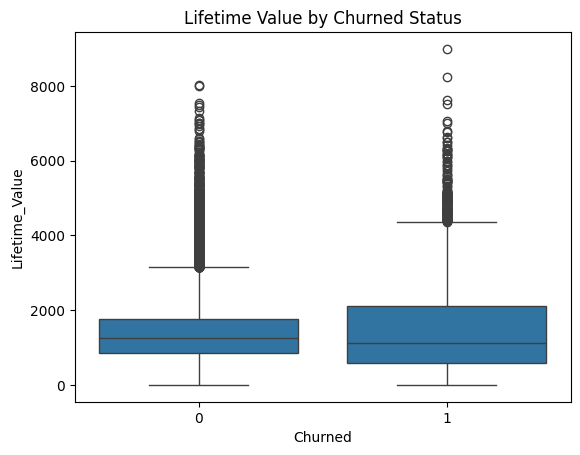

In [27]:
sns.boxplot(x='Churned', y='Lifetime_Value', data=df_clean)
plt.title('Lifetime Value by Churned Status')
plt.show()

### Insight 1: Lifetime Value VS Churn
Customers who churned show a significantly lower lifetime value compared to retained customers, indicating that retention strongly correlates with long-term revenue.

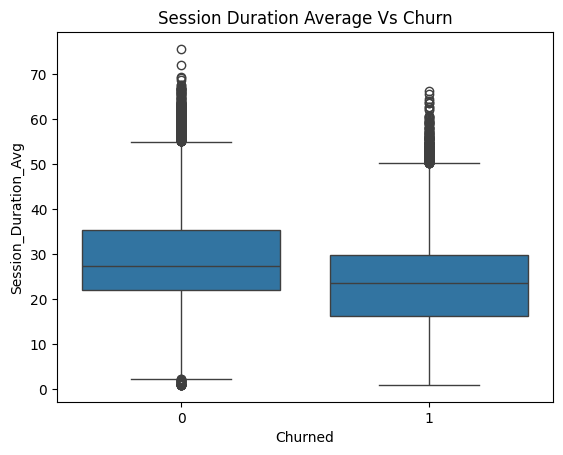

In [28]:
sns.boxplot(x='Churned', y='Session_Duration_Avg', data=df_clean)
plt.title('Session Duration Average Vs Churn')
plt.show()

### Insight 2: Session Duration Average vs Churn
Retained cutomers have longer average session durations than churned customers, indicating higher engagement . Shorter session durations are associated with increased churn risk,making engagement a key factor in customer retention.

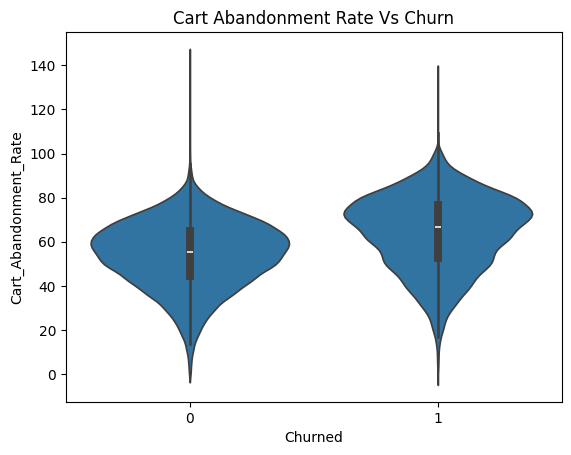

In [29]:
sns.violinplot(x='Churned', y='Cart_Abandonment_Rate', data=df_clean)
plt.title('Cart Abandonment Rate Vs Churn')
plt.show()


### Insight 3: Cart Abandonment Rate
Churned customers exhibit significantly higher cart abandonment rates compared to retained customers. This suggests that friciton during the checkout process is a strong indicator of churn risk.

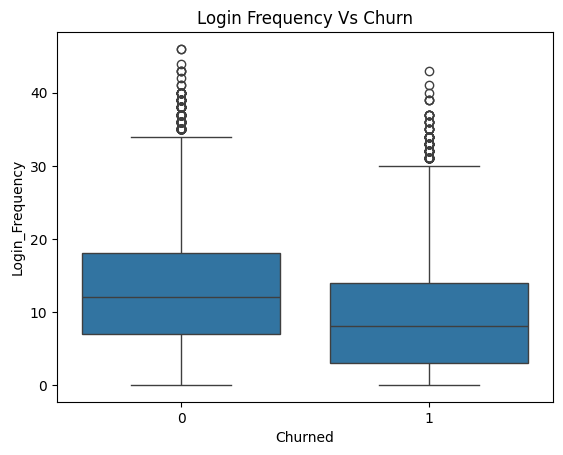

In [30]:
sns.boxplot(x='Churned', y='Login_Frequency', data=df_clean)
plt.title('Login Frequency Vs Churn')
plt.show()


### Insight 4: Login Frequency vs churn
Churned customers demonstrate lower login frequency compared to retained customers, indicating reduced platform engagement prior to churn.

### 3.1 Key Insights Summary
1. Customers who churned show a significantly lower lifetime value compared to retained customers, indicating that retention strongly correlates with long-term revenue.
2. Retained cutomers have longer average session durations than churned customers, indicating higher engagement . Shorter session durations are associated with increased churn risk,making engagement a key factor in customer retention.
3. Higher cart abandonment rates are stronger behavioral indicator of churn risk.
4. Churned customers demonstrate lower login frequency compared to retained customers, indicating reduced platform engagement prior to churn.

### 3.2 Business Recommendation
Based on the analysis, the following actions are recommended:
- Monitor engagement metrics such as login frenquency and session duration average to identify customers at risk of churn.
- Reduce checkout friction to lower cart abandonment rates.
- Implement targeted re-engagement compaigns for low-activity users to improve retention and lifetime value.

## 4. Predictive Modeling: Customer Churn Prediction

### 4.1 Feature Selection

Based on exploratory data analysis, the following features were selected due to their strong relationship with customer churn:
- Login Frequency
- Session Duration Average
- Pages per Session
- Cart Abandonment Rate
- Lifetime Value
- Days Since Last Purchase


In [31]:
# Prepare Features and Target Variable
features = ['Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Lifetime_Value','Days_Since_Last_Purchase']
Target = 'Churned'

X = df_clean[features].copy()
y = df_clean[Target].copy()

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (50000, 6)
y shape: (50000,)


In [32]:
# Check for missing values 
X.isna().sum()

Login_Frequency             0
Session_Duration_Avg        0
Pages_Per_Session           0
Cart_Abandonment_Rate       0
Lifetime_Value              0
Days_Since_Last_Purchase    0
dtype: int64

In [33]:
X.fillna(X.median())

,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Lifetime_Value,Days_Since_Last_Purchase
0,14.0,27.4,6.0,50.6,953.33,34.0
1,15.0,42.7,10.3,37.7,1067.47,71.0
2,10.0,24.8,1.6,70.9,1289.75,11.0
3,10.0,38.4,14.8,41.7,2340.92,47.0
4,29.0,51.4,8.4,19.1,3041.29,73.0
...,...,...,...,...,...,...
49995,10.0,35.8,8.8,51.2,2365.98,18.0
49996,21.0,32.4,9.6,32.5,1293.60,48.0
49997,19.0,40.3,10.4,50.6,1655.28,7.0
49998,17.0,29.9,10.1,60.8,1286.11,72.0


### 4.2 Data Preprocessing & Train-Test Split

In [34]:
# Traing and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25,     # 25% for testing
random_state=42,          # to ensure reproducibility
stratify=y                # keep churn ratio same
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("Train Churn Distribution:\n", y_train.value_counts(normalize=True))
print("Test Churn Distribution:\n", y_test.value_counts(normalize=True))



X_train shape: (37500, 6)
X_test shape: (12500, 6)
Train Churn Distribution:
 Churned
0    0.710987
1    0.289013
Name: proportion, dtype: float64
Test Churn Distribution:
 Churned
0    0.71104
1    0.28896
Name: proportion, dtype: float64


### 4.3 Feature Scaling

In [35]:
# Features Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train means:",np.round (X_train_scaled.mean(axis=0), 3))
print("Train stds:",np.round ( X_train_scaled.std(axis=0), 3))

Train means: [ 0.  0. -0. -0.  0.  0.]
Train stds: [1. 1. 1. 1. 1. 1.]


### 4.4 Model Training - Logistic Regression 


In [36]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    random_state=42)

model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


### 4.5 Model Evaluation

Accuracy:  0.674
ROC AUC:  0.745
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74     26662
           1       0.46      0.70      0.55     10838

    accuracy                           0.67     37500
   macro avg       0.65      0.68      0.65     37500
weighted avg       0.73      0.67      0.69     37500



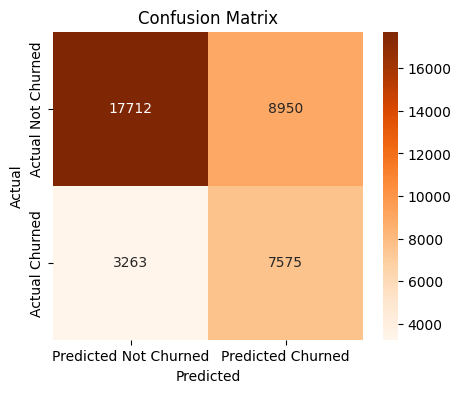

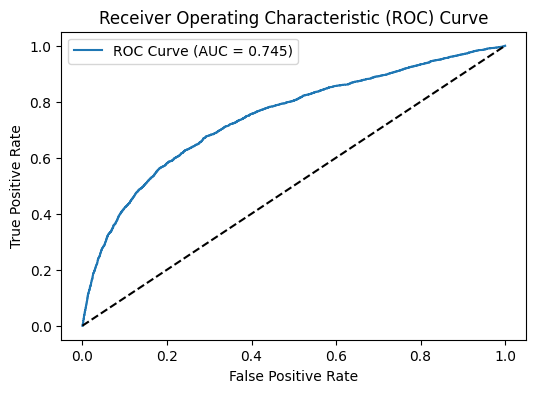

In [37]:
# Evaluate Model
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)
# Predictions
y_pred = model.predict(X_train_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]
# Metrics
accuracy = accuracy_score(y_train, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy: .3f}")
print(f"ROC AUC: {roc_auc: .3f}")

print("Classification Report:\n", classification_report(y_train, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Oranges',
            xticklabels=['Predicted Not Churned', 'Predicted Churned'],
            yticklabels=['Actual Not Churned', 'Actual Churned'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### 4.6 Key Model Evaluation Insights

- The Logistic Regression model demonstrates strong predictive capability, achieving a **ROC AUC of 0.745**, which indicates a good ability to distinguish between churned and retained customers.

- The model prioritizes churn detection, achieving a **70% recall** for churned customers. This makes it suitable for retention use cases where identifying at-risk customers is more critical than avoiding false positives.

- Although the overall accuracy is **67.4%** and churn precision is **46%**, these trade-offs are acceptable in a business context. The confusion matrix confirms that the model can function effectively as an **early warning system** for proactive customer retention strategies.



### 4.7 Model Interpretation




In [38]:
# Model Interpretation : Feature Importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
4,Lifetime_Value,0.621775
3,Cart_Abandonment_Rate,0.606920
5,Days_Since_Last_Purchase,0.328088
0,Login_Frequency,-0.140262
1,Session_Duration_Avg,-0.205362
2,Pages_Per_Session,-0.252261


The Logistic Regression model coefficients provide insight into which customer behaviors most strongly influence churn probability. Positive coefficients indicate a higher risk of churn, while negative coefficients are associated with customer retention.

#### High-Risk Churn Drivers
- **Lifetime_Value** shows the strongest positive relationship with churn. This suggests that customers who historically generated higher value may be leaving after unmet expectations or reduced engagement.
- **Cart_Abandonment_Rate** is a major churn indicator, highlighting friction in the purchasing process or hesitation before conversion.
- **Days_Since_Last_Purchase** indicates that customers who have not made a recent purchase are significantly more likely to churn.

#### Retention Indicators
- **Login_Frequency** reduces churn probability, showing that frequent platform interaction supports retention.
- **Session_Duration_Avg** and **Pages_Per_Session** are both negatively associated with churn, indicating that deeper engagement and longer browsing sessions strengthen customer loyalty.

Overall, the model emphasizes that declining engagement and purchasing hesitation are key precursors to customer churn.

## Final Conclusion

This project analyzed e-commerce customer behavior to identify key drivers of churn and to build a predictive model for early churn detection.

Exploratory data analysis revealed clear behavioral differences between churned and retained customers, particularly in engagement metrics such as login frequency, session duration, and cart abandonment behavior. These insights were translated into actionable business recommendations focused on improving customer engagement and reducing friction in the purchasing journey.

A Logistic Regression model was developed to predict customer churn. The model achieved a **ROC AUC of 0.745**, demonstrating a strong ability to distinguish between churned and retained customers. Model interpretation showed that **cart abandonment rate, days since last purchase, and lifetime value** are the strongest predictors of churn, while engagement-related features reduce churn risk.

Overall, the model can serve as an effective early-warning system to identify at-risk customers and support proactive retention strategies. Future improvements could include testing more advanced models and incorporating real-time behavioral data.


